In [1]:
#import
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
from grid_world import standard_grid, negative_grid
from iterative_policy_evaluation import print_values, print_policy
from td0_prediction import play_game, SMALL_ENOUGH, GAMMA, ALPHA, ALL_POSSIBLE_ACTIONS

In [2]:
# NOTE: this is only policy evaluation, not optimization

class Model:
  def __init__(self):
    self.theta = np.random.randn(4) / 2
  
  def s2x(self, s):
    return np.array([s[0] - 1, s[1] - 1.5, s[0]*s[1] - 3, 1])

  def predict(self, s):
    x = self.s2x(s)
    return self.theta.dot(x)

  def grad(self, s):
    return self.s2x(s)

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|


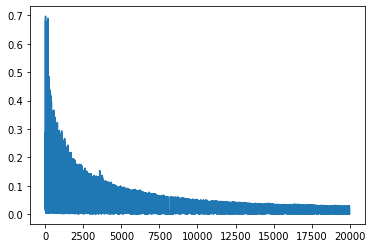

values:
---------------------------
 0.78| 0.87| 0.97| 0.00|
---------------------------
 0.66| 0.00|-0.05| 0.00|
---------------------------
 0.55|-0.27|-1.08|-1.89|
policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  R  |     |
---------------------------
  U  |  R  |  R  |  U  |


In [3]:
#main
if __name__ == '__main__':
  # use the standard grid again (0 for every step) so that we can compare
  # to iterative policy evaluation
  grid = standard_grid()

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # state -> action
  policy = {
    (2, 0): 'U',
    (1, 0): 'U',
    (0, 0): 'R',
    (0, 1): 'R',
    (0, 2): 'R',
    (1, 2): 'R',
    (2, 1): 'R',
    (2, 2): 'R',
    (2, 3): 'U',
  }

  model = Model()
  deltas = []

  # repeat until convergence
  k = 1.0
  for it in range(20000):
    if it % 10 == 0:
      k += 0.01
    alpha = ALPHA/k
    biggest_change = 0

    # generate an episode using pi
    states_and_rewards = play_game(grid, policy)
    # the first (s, r) tuple is the state we start in and 0
    # (since we don't get a reward) for simply starting the game
    # the last (s, r) tuple is the terminal state and the final reward
    # the value for the terminal state is by definition 0, so we don't
    # care about updating it.
    for t in range(len(states_and_rewards) - 1):
      s, _ = states_and_rewards[t]
      s2, r = states_and_rewards[t+1]
      # we will update V(s) AS we experience the episode
      old_theta = model.theta.copy()
      if grid.is_terminal(s2):
        target = r
      else:
        target = r + GAMMA*model.predict(s2)
      model.theta += alpha*(target - model.predict(s))*model.grad(s)
      biggest_change = max(biggest_change, np.abs(old_theta - model.theta).sum())
    deltas.append(biggest_change)

  plt.plot(deltas)
  plt.show()

  # obtain predicted values
  V = {}
  states = grid.all_states()
  for s in states:
    if s in grid.actions:
      V[s] = model.predict(s)
    else:
      # terminal state or state we can't otherwise get to
      V[s] = 0

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)